In [1]:
import helper
import fc_model
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

### Load Data

In [3]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])

In [4]:
train_set = datasets.FashionMNIST("../Data/", download=False, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

In [5]:
test_set = datasets.FashionMNIST("../Data/", download=False, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

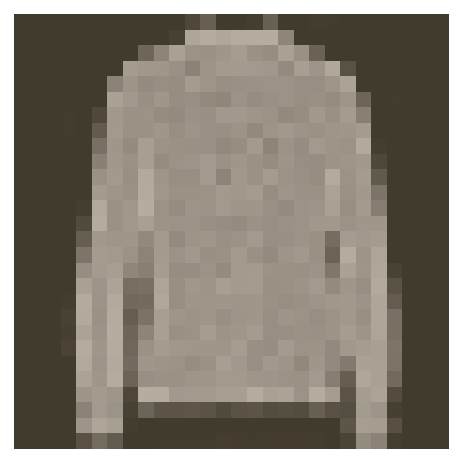

In [6]:
image, label = next(iter(train_loader))
helper.imshow(image[0, :])

### Train Network

In [7]:
model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
fc_model.train(model, train_loader, test_loader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 0.581..  Test Loss: 0.475..  Test Accuracy: 0.826
Epoch: 1/2..  Training Loss: 0.530..  Test Loss: 0.484..  Test Accuracy: 0.822
Epoch: 1/2..  Training Loss: 0.547..  Test Loss: 0.474..  Test Accuracy: 0.822
Epoch: 1/2..  Training Loss: 0.552..  Test Loss: 0.469..  Test Accuracy: 0.829
Epoch: 1/2..  Training Loss: 0.585..  Test Loss: 0.489..  Test Accuracy: 0.820
Epoch: 1/2..  Training Loss: 0.586..  Test Loss: 0.495..  Test Accuracy: 0.828
Epoch: 1/2..  Training Loss: 0.547..  Test Loss: 0.475..  Test Accuracy: 0.829
Epoch: 1/2..  Training Loss: 0.545..  Test Loss: 0.469..  Test Accuracy: 0.831
Epoch: 1/2..  Training Loss: 0.515..  Test Loss: 0.474..  Test Accuracy: 0.827
Epoch: 1/2..  Training Loss: 0.546..  Test Loss: 0.477..  Test Accuracy: 0.819
Epoch: 1/2..  Training Loss: 0.520..  Test Loss: 0.452..  Test Accuracy: 0.836
Epoch: 1/2..  Training Loss: 0.517..  Test Loss: 0.463..  Test Accuracy: 0.829
Epoch: 1/2..  Training Loss: 0.543..  Test Loss: 0.4

### Saving and Loading Networks

In [14]:
model

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [16]:
model.state_dict().keys()

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])

In [18]:
# save as checkpoint
torch.save(model.state_dict(), "checkpoint.pth")

In [19]:
# load the checkpoint
state_dict = torch.load("checkpoint.pth")
state_dict.keys()

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])

In [21]:
# load state_dict into the network
model.load_state_dict(state_dict)

<All keys matched successfully>